## Exercise 7.2

#### Within the GitHub for Week 7, you’ll find a data set named eda_classification.csv. This data set contains both continuous and categorical variables and the target is binary (0 or 1). Build a model that predicts ‘y’ (i.e., the column labeled ‘y’). Note that you’ll need to consider EDA and feature engineering to do this. Be sure to review the feature engineering article from Week 3. You're welcome to try and calculate an appropriate evaluation metric, although it's not required since we won't cover that until next week. Note that the model will not perform well, the data is not build for making predictions, it's built for you to perform EDA on categorical data.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Bellevue University/DSC410 Predictive Analytics/eda_classification.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,Jun,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,July,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,Aug,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,Aug,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,May,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,Apr,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,-13.506947,0.00%,2.840758,volkswagon,thurday,-30.167906,0.979618,small,1
9995,41.257961,May,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,20.841980,0.00%,-2.268718,bmw,wed,-7.595250,0.269051,small,1
9996,11.431402,May,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,3.114821,-0.02%,-5.195810,Honda,wednesday,9.583622,1.684282,small,1
9997,-19.039869,Aug,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,-67.440846,-0.01%,6.179807,bmw,friday,3.873697,-0.525457,small,0


In [74]:
# get a sample of the data to view
df.sample(3).T

,9744,8227,9822
x0,11.170727,46.221616,33.68798
x1,Aug,Aug,Aug
x2,-42.217128,-18.800849,9.525826
x3,28.968581,5.891362,-15.562181
x4,-2.479128,-6.766996,-4.236086
x5,13.645592,-2.200943,6.327827
x6,-10.616373,-23.516741,31.050062
x7,$228.83,$446.02,$341.18
x8,62.228543,44.624646,-157.802618
x9,-12.025829,50.947068,52.174192


## Observations

#### Columns x0, x2-x6, x8-x10, x11, x15-x16 appears to be our continuous data. Columns x1 and x14 are datetime/day data while x13 and x17 are categorical data. Columns x11 and x17 are currency and percentage data respectively that need to be converted for handling. NaN values are prevalent throughout as well and will need to be handled.

In [75]:
df.isna().sum()

x0     3
x1     0
x2     4
x3     3
x4     2
x5     2
x6     0
x7     3
x8     1
x9     0
x10    3
x11    2
x12    4
x13    1
x14    2
x15    0
x16    1
x17    0
y      0
dtype: int64

In [76]:
df['x1'].value_counts()

July       2709
Jun        2357
Aug        2059
May        1144
sept.       912
Apr         413
Oct         246
Mar         116
Nov          27
Feb          10
Dev           5
January       1
Name: x1, dtype: int64

In [77]:
# cleaning up x1 columns containing months to be correct and consistent

df = df.replace({'July': 'Jul',
                 'sept.': 'Sep',
                 'Dev': 'Dec',
                 'January': 'Jan'})
df['x1'].value_counts()

Jul    2709
Jun    2357
Aug    2059
May    1144
Sep     912
Apr     413
Oct     246
Mar     116
Nov      27
Feb      10
Dec       5
Jan       1
Name: x1, dtype: int64

#### It appears that whatever these entries are occur more frequently in the warmer, summer months than they do in the winter months. Seeing this, I will now update the categorical value of the month with the numerical value of the frequency in which it occurs in my dataset to provide weighting for the model.

In [78]:
df = df.replace(df.x1.value_counts(normalize=True).to_dict())
df.rename(columns = {'x1': 'month'}, inplace=True)
df # column x1 will now represent the % value (0-1) in which it occurs in our dataset


,x0,month,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,thurday,9.729891,-0.786431,small,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,thur,35.727926,-0.985552,small,0
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,wednesday,-9.283523,-3.394718,small,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,wed,-2.891882,-2.690222,small,0
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,wednesday,25.497480,3.516801,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,-13.506947,0.00%,2.840758,volkswagon,thurday,-30.167906,0.979618,small,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,20.841980,0.00%,-2.268718,bmw,wed,-7.595250,0.269051,small,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,3.114821,-0.02%,-5.195810,Honda,wednesday,9.583622,1.684282,small,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,-67.440846,-0.01%,6.179807,bmw,friday,3.873697,-0.525457,small,0


#### Now let's do the same thing with column x14 which is the day of the week.

In [79]:
df['x14'].value_counts()

wed          3709
thurday      3336
wednesday    1489
thur         1097
tuesday       214
friday        130
monday         15
fri             7
Name: x14, dtype: int64

In [80]:
df = df.replace({'wed': 'Wed',
                 'thurday': 'Thu',
                 'wednesday': 'Wed',
                 'thur': 'Thu',
                 'tuesday': 'Tue',
                 'friday': 'Fri',
                 'monday': 'Mon',
                 'fri': 'Fri'})
df = df.replace(df.x14.value_counts(normalize=True).to_dict())
df = df.rename(columns={'x14': 'day_of_week'})
df

,x0,month,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,day_of_week,x15,x16,x17,y
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,tesla,0.443433,9.729891,-0.786431,small,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,Toyota,0.443433,35.727926,-0.985552,small,0
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,bmw,0.519956,-9.283523,-3.394718,small,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,Toyota,0.519956,-2.891882,-2.690222,small,0
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,Honda,0.519956,25.497480,3.516801,small,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,-13.506947,0.00%,2.840758,volkswagon,0.443433,-30.167906,0.979618,small,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,20.841980,0.00%,-2.268718,bmw,0.519956,-7.595250,0.269051,small,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,3.114821,-0.02%,-5.195810,Honda,0.519956,9.583622,1.684282,small,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,-67.440846,-0.01%,6.179807,bmw,0.013704,3.873697,-0.525457,small,0


#### For column x17, the values are categorical representing small, medium, and large. For this I will use the get_dummies method in Pandas to create new columns to represent either a 1 or 0 for each value.

In [81]:
df['x17'].value_counts()

small     8849
medium     783
large      367
Name: x17, dtype: int64

In [82]:
df = pd.get_dummies(df, columns=['x17'])
df = df.rename(columns={'x17_large': 'large',
                        'x17_medium': 'medium',
                        'x17_small': 'small',})
df

,x0,month,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,day_of_week,x15,x16,y,large,medium,small
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,...,-0.01%,0.217010,tesla,0.443433,9.729891,-0.786431,1,0,0,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,...,0.00%,-3.584908,Toyota,0.443433,35.727926,-0.985552,0,0,0,1
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,...,0.00%,-3.991366,bmw,0.519956,-9.283523,-3.394718,1,0,0,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,...,0.01%,7.908897,Toyota,0.519956,-2.891882,-2.690222,0,0,0,1
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,...,-0.01%,0.846719,Honda,0.519956,25.497480,3.516801,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,"($1,481.74)",203.758763,28.032961,...,0.00%,2.840758,volkswagon,0.443433,-30.167906,0.979618,1,0,0,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,$417.34,81.247235,32.269791,...,0.00%,-2.268718,bmw,0.519956,-7.595250,0.269051,1,0,0,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,"($1,937.19)",68.974245,-12.463081,...,-0.02%,-5.195810,Honda,0.519956,9.583622,1.684282,1,0,0,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,"($1,472.62)",82.525340,18.593754,...,-0.01%,6.179807,bmw,0.013704,3.873697,-0.525457,0,0,0,1


#### Now to clean up the string dollar amount in column x7 to make it a true float without extra currency characters.

In [86]:
# cleanup of the dollar amount in column x7

def process_amount(amount_str):
    amount_str = str(amount_str)
    cleaned_str = amount_str.replace('(', '-').replace(')', '').replace('$', '').replace(',', '')
    return float(cleaned_str)

df['x7'] = df['x7'].apply(process_amount)
df = df.rename(columns={'x7': 'amount'})
df

,x0,month,x2,x3,x4,x5,x6,amount,x8,x9,...,x11,x12,x13,day_of_week,x15,x16,y,large,medium,small
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,-1306.52,-89.394348,-28.454044,...,-0.01%,0.217010,tesla,0.443433,9.729891,-0.786431,1,0,0,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,-24.86,153.032652,-32.557736,...,0.00%,-3.584908,Toyota,0.443433,35.727926,-0.985552,0,0,0,1
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,-110.85,-141.437276,-20.794952,...,0.00%,-3.991366,bmw,0.519956,-9.283523,-3.394718,1,0,0,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,-324.43,51.039653,-7.046908,...,0.01%,7.908897,Toyota,0.519956,-2.891882,-2.690222,0,0,0,1
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,1213.37,-31.046700,19.061182,...,-0.01%,0.846719,Honda,0.519956,25.497480,3.516801,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,-1481.74,203.758763,28.032961,...,0.00%,2.840758,volkswagon,0.443433,-30.167906,0.979618,1,0,0,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,417.34,81.247235,32.269791,...,0.00%,-2.268718,bmw,0.519956,-7.595250,0.269051,1,0,0,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,-1937.19,68.974245,-12.463081,...,-0.02%,-5.195810,Honda,0.519956,9.583622,1.684282,1,0,0,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,-1472.62,82.525340,18.593754,...,-0.01%,6.179807,bmw,0.013704,3.873697,-0.525457,0,0,0,1


#### Now to look at the last categorical column which appears to be vehicle make. I'm going to clean that up a bit to correct spelling errors but leave as-is otherwise for the time being.

In [88]:
df['x13'].value_counts()

volkswagon    3132
Toyota        2773
bmw           1837
Honda         1277
tesla          545
chrystler      291
nissan          90
ford            39
mercades        11
chevrolet        3
Name: x13, dtype: int64

In [89]:
df = df.replace({'volkswagon': 'volkswagen',
                 'Toyota': 'toyota',
                 'Honda': 'honda',
                 'chrystler': 'chrysler',
                 'mercades': 'mercedes',})
df = df.rename(columns={'x13': 'vehicle_make'})
df

,x0,month,x2,x3,x4,x5,x6,amount,x8,x9,...,x11,x12,vehicle_make,day_of_week,x15,x16,y,large,medium,small
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,-1306.52,-89.394348,-28.454044,...,-0.01%,0.217010,tesla,0.443433,9.729891,-0.786431,1,0,0,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,-24.86,153.032652,-32.557736,...,0.00%,-3.584908,toyota,0.443433,35.727926,-0.985552,0,0,0,1
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,-110.85,-141.437276,-20.794952,...,0.00%,-3.991366,bmw,0.519956,-9.283523,-3.394718,1,0,0,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,-324.43,51.039653,-7.046908,...,0.01%,7.908897,toyota,0.519956,-2.891882,-2.690222,0,0,0,1
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,1213.37,-31.046700,19.061182,...,-0.01%,0.846719,honda,0.519956,25.497480,3.516801,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,-1481.74,203.758763,28.032961,...,0.00%,2.840758,volkswagen,0.443433,-30.167906,0.979618,1,0,0,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,417.34,81.247235,32.269791,...,0.00%,-2.268718,bmw,0.519956,-7.595250,0.269051,1,0,0,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,-1937.19,68.974245,-12.463081,...,-0.02%,-5.195810,honda,0.519956,9.583622,1.684282,1,0,0,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,-1472.62,82.525340,18.593754,...,-0.01%,6.179807,bmw,0.013704,3.873697,-0.525457,0,0,0,1


#### Now the last step before creating our model will be to go account for any missing/NaN values. Since the sum of NaN values in each column are so low compared to our total dataset as seen below, I will simply drop each row that contains at least one NaN value in it. *Note that I'm ignoring the percentage value in column x11 for the time being.

In [90]:
df.isna().sum()

x0              3
month           0
x2              4
x3              3
x4              2
x5              2
x6              0
amount          3
x8              1
x9              0
x10             3
x11             2
x12             4
vehicle_make    1
day_of_week     2
x15             0
x16             1
y               0
large           0
medium          0
small           0
dtype: int64

In [91]:
df = df.dropna() # removes 32 rows total
df

,x0,month,x2,x3,x4,x5,x6,amount,x8,x9,...,x11,x12,vehicle_make,day_of_week,x15,x16,y,large,medium,small
0,-17.933519,0.235724,6.559220,-14.452810,-4.732855,0.381673,2.563194,-1306.52,-89.394348,-28.454044,...,-0.01%,0.217010,tesla,0.443433,9.729891,-0.786431,1,0,0,1
1,-37.214754,0.270927,10.774930,-15.384004,-0.077339,10.983774,-15.210206,-24.86,153.032652,-32.557736,...,0.00%,-3.584908,toyota,0.443433,35.727926,-0.985552,0,0,0,1
2,0.330441,0.205921,-19.609972,-9.167911,2.064124,12.071688,12.506141,-110.85,-141.437276,-20.794952,...,0.00%,-3.991366,bmw,0.519956,-9.283523,-3.394718,1,0,0,1
3,-13.709765,0.205921,-8.011390,6.759264,1.727615,-1.768382,24.039733,-324.43,51.039653,-7.046908,...,0.01%,7.908897,toyota,0.519956,-2.891882,-2.690222,0,0,0,1
4,-4.202598,0.114411,7.076210,-26.004919,-4.269696,-3.414224,2.115989,1213.37,-31.046700,19.061182,...,-0.01%,0.846719,honda,0.519956,25.497480,3.516801,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-1.967405,0.041304,-25.561679,28.188776,1.150223,-1.887983,-10.482834,-1481.74,203.758763,28.032961,...,0.00%,2.840758,volkswagen,0.443433,-30.167906,0.979618,1,0,0,1
9995,41.257961,0.114411,-0.264639,11.293025,-5.768300,4.088754,0.300116,417.34,81.247235,32.269791,...,0.00%,-2.268718,bmw,0.519956,-7.595250,0.269051,1,0,0,1
9996,11.431402,0.114411,-28.363664,-35.619430,10.238941,6.494562,-0.407489,-1937.19,68.974245,-12.463081,...,-0.02%,-5.195810,honda,0.519956,9.583622,1.684282,1,0,0,1
9997,-19.039869,0.205921,-20.251227,-3.002298,-1.039843,10.741492,-26.970477,-1472.62,82.525340,18.593754,...,-0.01%,6.179807,bmw,0.013704,3.873697,-0.525457,0,0,0,1


## Building our model

#### Splitting our dataset into features and a target:

<ipython-input-92-7835ee578bdb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

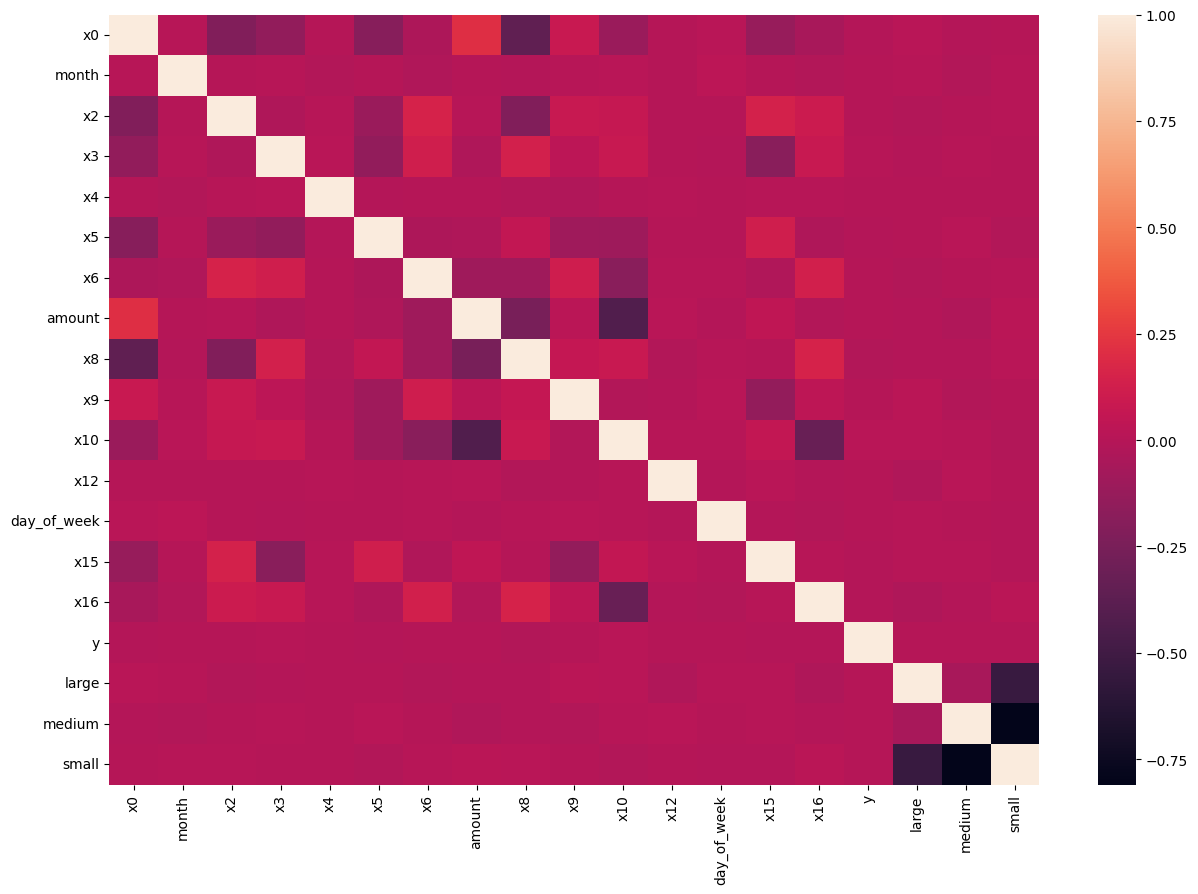

In [92]:
# looking at feature correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

#### There isn't much to learn from the heatmap above so I'm going to separate out features I believe are relevant as a starting point.

In [93]:
feature_columns = ['x0', 'month', 'amount', 'day_of_week','x15', 'x16', 'large', 'medium', 'small']
X = df[feature_columns] # features
y = df.y # target

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[838, 199],
       [793, 164]])

#### As mentioned in the assignment description, the current model will not and does not perform well as seen below:

In [96]:
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.51      0.81      0.63      1037
           0       0.45      0.17      0.25       957

    accuracy                           0.50      1994
   macro avg       0.48      0.49      0.44      1994
weighted avg       0.48      0.50      0.45      1994

